In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [2]:
# data import
main_df = pd.read_csv('./netflix_titles.csv')
main_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


- show_id: Unique ID for every Movie / Tv Show
- type: Identifier - A Movie or TV Show
- title: Title of the Movie / Tv Show
- director: Director of the Movie
- cast: Actors involved in the movie / show
- country: Country where the movie / show was produced
- date_added: Date it was added on Netflix
- release_year: Actual Release year of the move / show
- rating: TV Rating of the movie / show
- duration: Total Duration - in minutes or number of seasons
- listed_in: Genre
- description: The summary description

<AxesSubplot:>

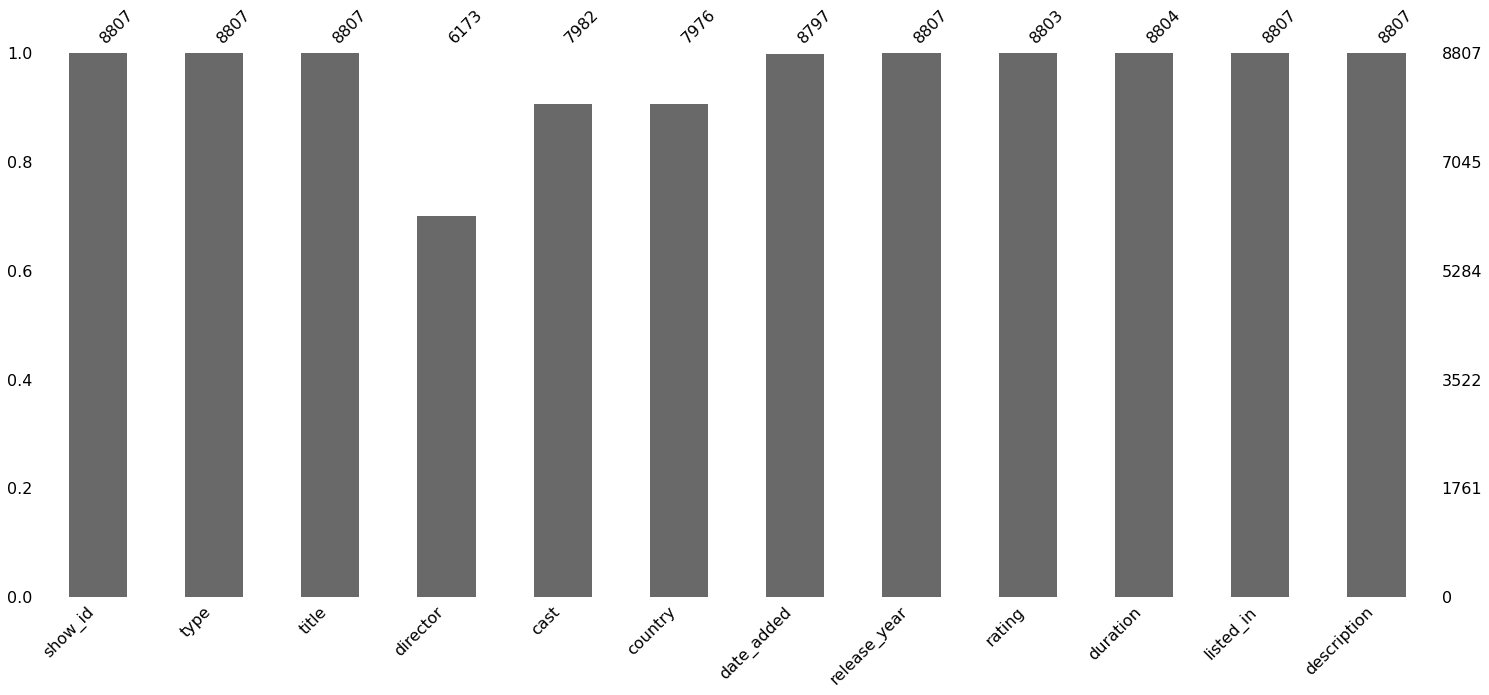

In [4]:
# 결측치 차트
msno.bar(main_df)

In [5]:
# 결측치 수
main_df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
# 유티크한 데이터 수
main_df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

# 결측치 삭제

In [7]:
# date_added 10개 행 삭제
main_df = main_df[main_df['date_added'].notna()]

# rating 4개 행 삭제
main_df = main_df[main_df['rating'].notna()]

# duration 3개 행 삭제
main_df = main_df[main_df['duration'].notna()]

main_df.isna().sum()

show_id            0
type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

# 데이터 타입 변환

In [8]:
main_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

date_added -> datetime <br>
duration -> int

In [10]:
main_df['date_added'] = main_df['date_added'].astype('datetime64')
main_df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8790, dtype: datetime64[ns]

duration은 type에 따라 다르다.<br>
type이 TV show인 경우, 1 Season or N Seasons로 구분된다.

In [13]:
main_df.loc[main_df['type'] == 'TV Show', 'duration']

1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
5        1 Season
          ...    
8795    2 Seasons
8796    2 Seasons
8797    3 Seasons
8800     1 Season
8803    2 Seasons
Name: duration, Length: 2664, dtype: object

In [14]:
# 1 Season or N Seasons로 표기되지 않는 예외 확인
(main_df.loc[main_df['type'] == 'TV Show', 'duration'].str.contains('Season') == False).sum()

0

In [15]:
# Season, Seasons 제거
main_df.loc[main_df['type'] == 'TV Show', 'duration'] = main_df.loc[main_df['type'] == 'TV Show', 'duration'].apply(lambda x : x.split(" ")[0])
main_df.loc[main_df['type'] == 'TV Show', 'duration']

1       2
2       1
3       1
4       2
5       1
       ..
8795    2
8796    2
8797    3
8800    1
8803    2
Name: duration, Length: 2664, dtype: object

type이 Movie인 경우, 모두 min으로 표기한다.

In [16]:
main_df.loc[main_df['type'] == 'Movie', 'duration']

0        90 min
6        91 min
7       125 min
9       104 min
12      127 min
         ...   
8801     96 min
8802    158 min
8804     88 min
8805     88 min
8806    111 min
Name: duration, Length: 6126, dtype: object

In [17]:
# min으로 표기되지 않는 예외 확인
(main_df.loc[main_df['type'] == 'Movie', 'duration'].str.contains('min') == False).sum()

0

In [18]:
# min 제거
main_df.loc[main_df['type'] == 'Movie', 'duration'] = main_df.loc[main_df['type'] == 'Movie', 'duration'].apply(lambda x: x.split(" ")[0])
main_df.loc[main_df['type'] == 'Movie', 'duration']

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6126, dtype: object

In [19]:
main_df['duration'] = main_df['duration'].astype('int64')

In [20]:
# 데이터 확인
main_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 시계열 데이터로 변환

In [21]:
main_df = main_df.set_index('date_added').sort_index()
main_df

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description
date_added,,,,,,,,,,,
2008-01-01,s5958,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2006,TV-MA,81,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea..."
2008-02-04,s6612,TV Show,Dinner for Five,NaN,NaN,United States,2007,TV-MA,1,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo..."
2009-05-05,s5957,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2007,TV-MA,104,"Dramas, International Movies",When he causes a car accident that leaves a yo...
2009-11-18,s5956,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009,TV-MA,29,Horror Movies,"After committing suicide, a washed-up rocker r..."
2010-11-01,s7371,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,1987,NR,84,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott..."
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
2021-09-24,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
2021-09-24,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,2021,TV-MA,1,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."


<AxesSubplot:xlabel='date_added'>

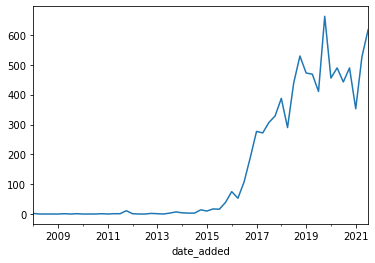

In [22]:
main_df['title'].resample('Q').count().plot()

<AxesSubplot:xlabel='date_added'>

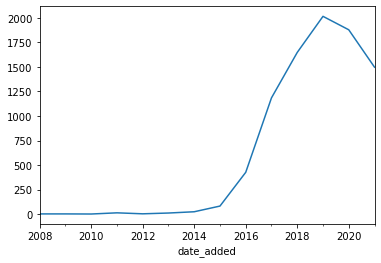

In [23]:
main_df['title'].resample('Y').count().plot()

In [24]:
main_df['title'].resample('Y').count()

date_added
2008-12-31       2
2009-12-31       2
2010-12-31       1
2011-12-31      13
2012-12-31       3
2013-12-31      11
2014-12-31      24
2015-12-31      82
2016-12-31     426
2017-12-31    1185
2018-12-31    1648
2019-12-31    2016
2020-12-31    1879
2021-12-31    1498
Freq: A-DEC, Name: title, dtype: int64

2016년부터 콘텐츠 수가 급등한다.<br>
시간축을 그대로 사용하면 불균형한 데이터가 되므로, 전체 기간을 몇 개의 구간으로 나누어 데이터가 몰리지 않도록 한다.<br>

In [33]:
# 0부터 9까지, 879개가 들어가도록 한다.
sections = []
for i in range(0, 10):
    section = np.ones(879, dtype=np.int8) * i
    sections.extend(section)
print(len(sections))

8790


In [34]:
main_df['sections'] = sections
main_df['sections'] = main_df['sections'].astype('str')
main_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
release_year     int64
rating          object
duration         int64
listed_in       object
description     object
sections        object
dtype: object

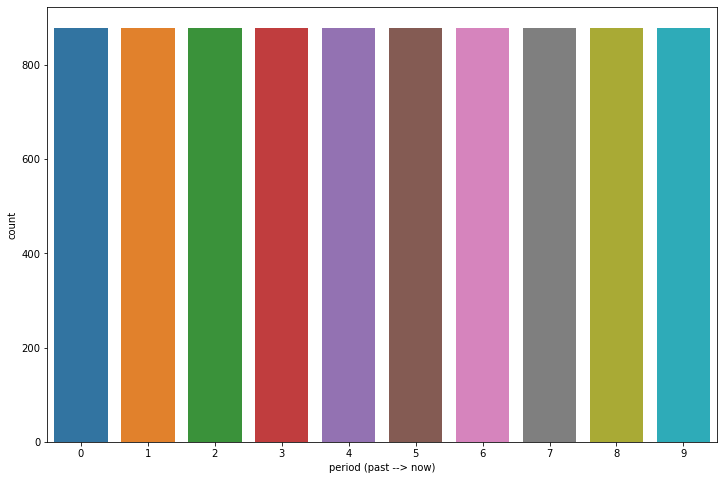

In [44]:
count_sections = main_df.groupby('sections').count()['title']

plt.figure(figsize = (12, 8))
sns.barplot(x=count_sections.index, y=count_sections.values)

plt.xlabel('period (past --> now)')
plt.ylabel('count')
plt.show()

8790개의 데이터를 879개씩 10개로 분할하였다.
sections이 9에 가까워질수록 현재와 가깝다.

# 넷플릭스 전략 (예상)

(최근이 될 수록)
*리뷰사이트 평점 top 1000*

**2. 다양한 국가의 콘텐츠를 늘린다. 나라별 작품 / 등급, 장르, 나라를 엮어서 분석하기**
**3. 키즈 콘텐츠를 늘린다.(디즈니와 키즈컨텐츠 어떻게 다른지 - 앞으로의 방향성도 알 수 있을 것)**
**4. 다양한 장르의 콘텐츠를 늘린다. / 넷플릭스 오리지널이 추가되면서 전략방향 변경여부 / 코로나 이후 재난영화**


**시각화 라이브러리 matplotlib, seaborn, plotly, volia**

### TV Show의 비중이 늘어나는가

In [36]:
main_df.groupby(['sections', 'type'])['title'].count().reset_index()

,sections,type,title
0,0,Movie,588
1,0,TV Show,291
2,1,Movie,609
3,1,TV Show,270
4,2,Movie,683
5,2,TV Show,196
6,3,Movie,635
7,3,TV Show,244
8,4,Movie,623
9,4,TV Show,256


In [37]:
count_type = pd.DataFrame(main_df.groupby(['sections', 'type']).count()['title'])
count_type.columns = ['count']
count_type

count
sections type          
0        Movie      588
         TV Show    291
1        Movie      609
         TV Show    270
2        Movie      683
         TV Show    196
3        Movie      635
         TV Show    244
4        Movie      623
         TV Show    256
5        Movie      600
         TV Show    279
6        Movie      624
         TV Show    255
7        Movie      606
         TV Show    273
8        Movie      595
         TV Show    284
9        Movie      563
         TV Show    316

In [38]:
count_type = pd.pivot_table(count_type, index='sections', columns='type')
count_type.columns = ['movie', 'tv']
count_type

,movie,tv
sections,,
0,588,291
1,609,270
2,683,196
3,635,244
4,623,256
5,600,279
6,624,255
7,606,273
8,595,284


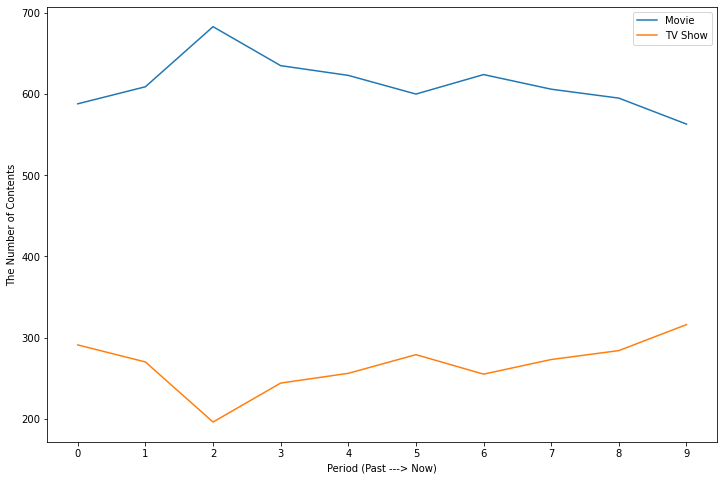

In [50]:
plt.figure(figsize = (12, 8))

sns.lineplot(data=count_type, x=count_type.index, y=count_type['movie'], label='Movie')
sns.lineplot(data=count_type, x=count_type.index, y=count_type['tv'], label='TV Show')

plt.legend()
plt.xlabel('Period (Past ---> Now)')
plt.ylabel('The Number of Contents')

plt.show()

**영화의 수가 훨씬 더 많지만, 추이를 보면 TV Show가 늘어나고 있는 것을 확인할 수 있다.**

### 다양한 국가의 콘텐츠가 늘어나는가

In [49]:
# 가장 최근 콘텐츠의 제작 국가
main_df.loc[main_df['sections'] == '9', 'country'].value_counts()[:10]

United States                    241
India                             46
Japan                             29
United Kingdom                    22
Nigeria                           17
United States, Canada             15
South Korea                        9
United Kingdom, United States      8
Spain                              8
United States, United Kingdom      8
Name: country, dtype: int64

In [45]:
top10_countries = main_df.loc[main_df['sections'] == '9', 'country'].value_counts()[:10].index
top10_countries

Index(['United States', 'India', 'Japan', 'United Kingdom', 'Nigeria',
       'United States, Canada', 'South Korea', 'United Kingdom, United States',
       'Spain', 'United States, United Kingdom'],
      dtype='object')

In [46]:
sections_by_top10 = main_df.loc[main_df['country'].isin(top10_countries), ['country', 'sections']]
sections_by_top10

,country,sections
date_added,,
2008-01-01,United States,0
2008-02-04,United States,0
2009-11-18,United States,0
2010-11-01,United States,0
2011-10-01,United States,0
...,...,...
2021-09-22,United States,9
2021-09-24,United Kingdom,9
2021-09-24,United States,9


In [47]:
sections_by_top10.loc[sections_by_top10['country'] == top10_countries[0]].groupby('sections').count()

,country
sections,
0,351
1,261
2,258
3,233
4,276
5,336
6,286
7,270
8,297


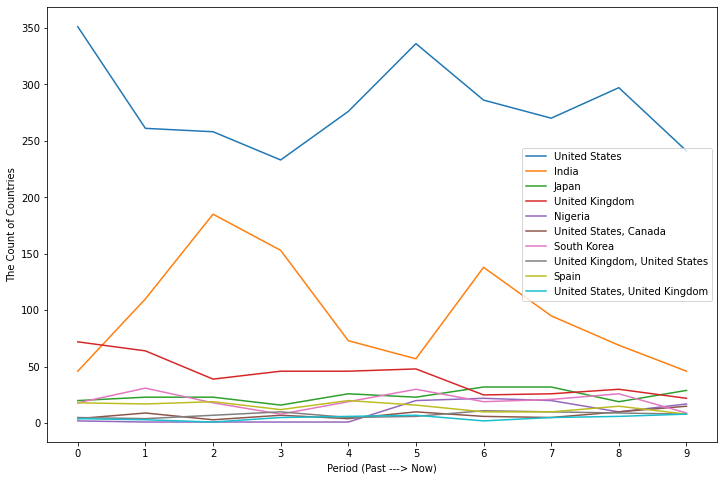

In [59]:
plt.figure(figsize = (12, 8))

for country in list(top10_countries):
    count_country = sections_by_top10.loc[sections_by_top10['country'] == country].groupby('sections').count()
    sns.lineplot(data=count_country, x=count_country.index, y=count_country['country'], label=country)
    
plt.legend(loc='center right')
plt.xlabel('Period (Past ---> Now)')
plt.ylabel('The Count of Countries')

plt.show()

**미국과 인도, 영국의 비중이 줄어들고 있지만 다른 나라의 콘텐츠가 늘어나고 있는지는 다른 방법으로 더 살펴봐야 할 것 같다.**

### 키즈 콘텐츠가 늘어나는가

In [60]:
main_df['rating'].unique()

array(['TV-MA', 'NR', 'TV-PG', 'TV-14', 'PG', 'R', 'TV-G', 'G', 'TV-Y',
       'TV-Y7-FV', 'TV-Y7', 'PG-13', 'NC-17', 'UR'], dtype=object)

In [62]:
rating_dict = {
    'little kids' : ['G','TV-G','TV-Y'],              # 전체관람가
    'older kids' : ['PG','TV-Y7','TV-Y7-FV','TV-PG'], # 7세 이상
    'teens' : ['PG-13', 'TV-14'],                     # 13세, 16세 이상
    'adult' : ['NC-17','R','TV-MA','NR','UR']         # 18세 이상, 청불 포함
}

In [64]:
ratings = rating_dict.keys()
rating_df = pd.DataFrame(columns=ratings)
rating_list = []

for i in range(0, 10):
    rating_list = []
    for key in rating_dict.keys():
        rating_list.append(main_df.loc[main_df['sections'] == str(i), 'rating'].str.contains('|'.join(rating_dict[key])).sum())
    rating_df = rating_df.append(pd.Series(rating_list, index = rating_df.columns), ignore_index = True)
rating_df = rating_df.astype('int64')
rating_df

,little kids,older kids,teens,adult
0,257,206,207,427
1,240,191,278,383
2,213,164,248,445
3,223,182,288,405
4,221,183,263,433
5,277,218,260,417
6,259,196,290,394
7,264,190,262,404
8,294,206,271,385
9,296,241,280,396


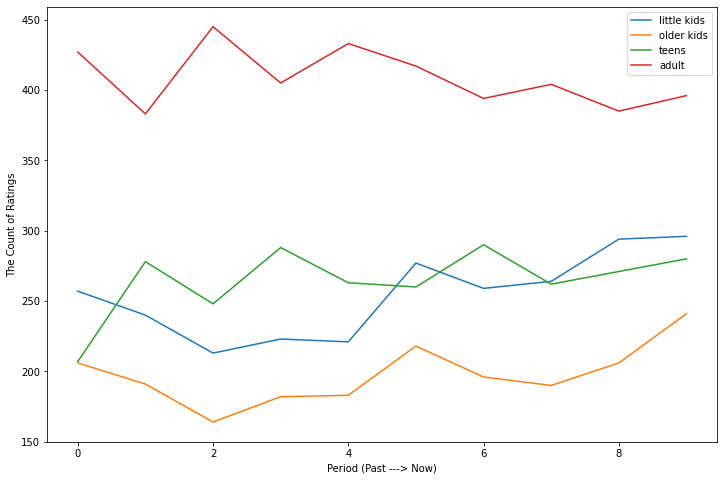

In [65]:
plt.figure(figsize = (12, 8))

for col in list(rating_df.columns):
    sns.lineplot(data=rating_df, x=rating_df.index, y=rating_df[col], label=col)
    
plt.legend()
plt.xlabel('Period (Past ---> Now)')
plt.ylabel('The Count of Ratings')

plt.show()

**어른 대상이 더 많기는 하지만 감소하는 추세이고, 키즈 콘텐츠는 증가하는 추세이다.**

### 다양한 장르의 콘텐츠가 늘어나는가

In [66]:
# 전체 기간 장르
main_df['listed_in'].value_counts()

Dramas, International Movies                            362
Documentaries                                           359
Stand-Up Comedy                                         334
Comedies, Dramas, International Movies                  274
Dramas, Independent Movies, International Movies        252
                                                       ... 
Anime Features                                            1
Classic Movies, Horror Movies, Thrillers                  1
TV Sci-Fi & Fantasy, TV Thrillers                         1
Action & Adventure, Classic Movies, Sci-Fi & Fantasy      1
British TV Shows, Docuseries, Reality TV                  1
Name: listed_in, Length: 513, dtype: int64

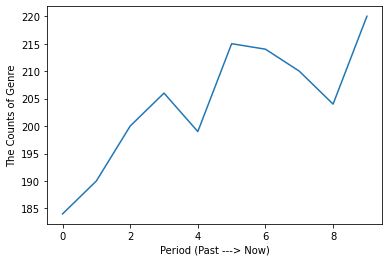

In [67]:
main_df.groupby('sections')['listed_in'].nunique().plot()

plt.xlabel('Period (Past ---> Now)')
plt.ylabel('The Counts of Genre')
plt.show()

**점점 더 장르가 다양해지고 있다.**

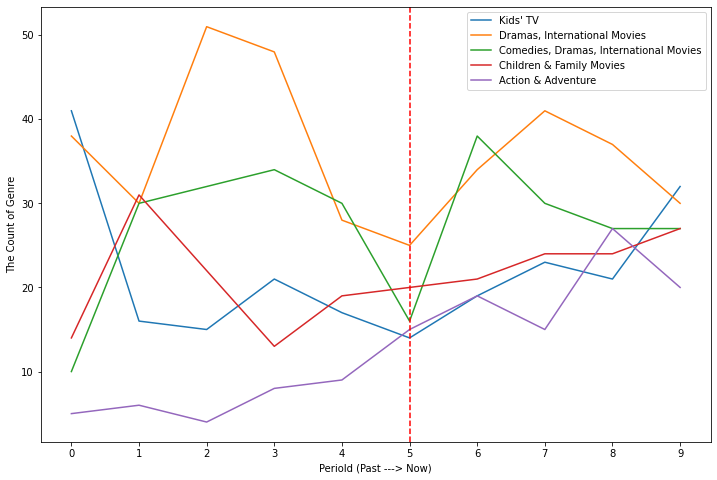

In [70]:
# 과거와 현재 장르 다양성 비교
top5_genre = main_df.loc[main_df['sections'] == '9', 'listed_in'].value_counts().index[:5]

plt.figure(figsize = (12, 8))

for genre in list(top5_genre):
    genre_count = main_df.loc[main_df['listed_in'] == genre].groupby('sections').count()['listed_in']
    sns.lineplot(x=genre_count.index, y=genre_count.values, label=genre)

plt.xlabel('Periold (Past ---> Now)')
plt.ylabel('The Count of Genre')
plt.axvline(x=5, linestyle='--', color='r')
plt.show()

**Dramas, International Movies의 비중이 다소 감소하고, 키즈, 가족 콘텐츠, 액션 등의 다양한 장르의 비중이 점점 높아지고 있다. (들쑥날쑥해서 써도 되는지 모르겠음)**